In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Load the dataset (update the file path as needed)
data = pd.read_csv('diabetes_prediction_dataset.csv')

# Display the first few rows to verify the data
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# Select only the 'blood_glucose_level' and 'bmi' features
X = data[['blood_glucose_level', 'bmi']]

# Target variable is 'diabetes'
y = data['diabetes']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler (important for some algorithms like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Initialize the models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

# Dictionary to store models
models = {
    'Random Forest': rf,
    'K-Nearest Neighbors': knn,
    'AdaBoost': ada,
    'Logistic Regression': lr,
    'Decision Tree': dt
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    
    # Store results for comparison
    model_performance[name] = accuracy


--- Random Forest ---
Accuracy: 0.9286
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18292
           1       0.62      0.42      0.50      1708

    accuracy                           0.93     20000
   macro avg       0.78      0.70      0.73     20000
weighted avg       0.92      0.93      0.92     20000

--- K-Nearest Neighbors ---
Accuracy: 0.9413
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.82      0.40      0.54      1708

    accuracy                           0.94     20000
   macro avg       0.88      0.70      0.75     20000
weighted avg       0.94      0.94      0.93     20000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- AdaBoost ---
Accuracy: 0.94725
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       1.00      0.38      0.55      1708

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.76     20000
weighted avg       0.95      0.95      0.94     20000

--- Logistic Regression ---
Accuracy: 0.9399
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     18292
           1       0.87      0.35      0.50      1708

    accuracy                           0.94     20000
   macro avg       0.90      0.67      0.73     20000
weighted avg       0.94      0.94      0.93     20000

--- Decision Tree ---
Accuracy: 0.93075
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18292
           1       0.64      0.43      0.51      1708

    accuracy                           0.93     20000
   macro

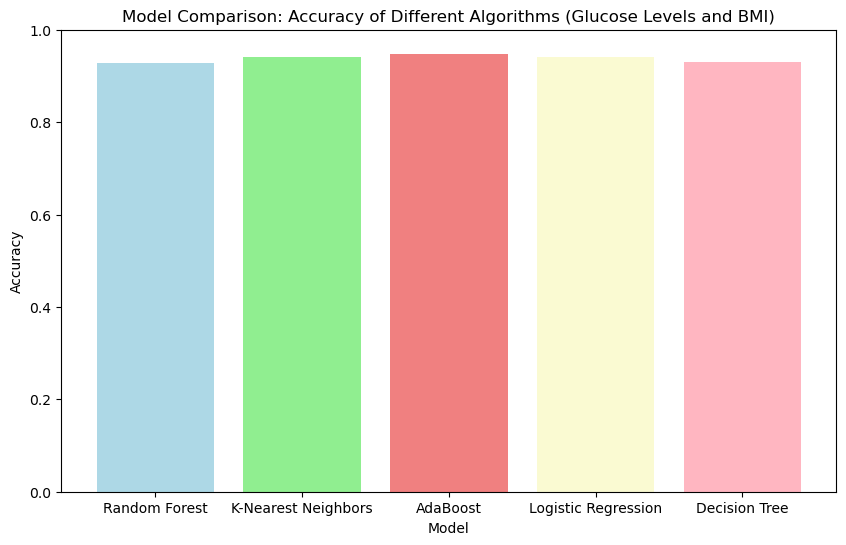

In [10]:
# Plot the accuracy of each model for comparison
model_names = list(model_performance.keys())
accuracy_values = list(model_performance.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['lightblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightpink'])
plt.title('Model Comparison: Accuracy of Different Algorithms (Glucose Levels and BMI)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()


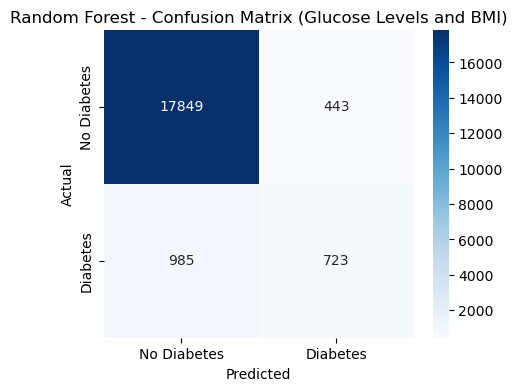

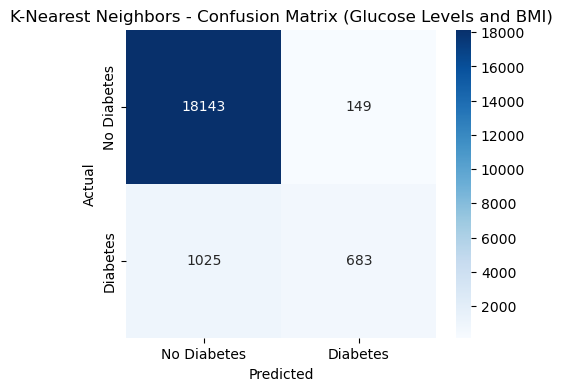

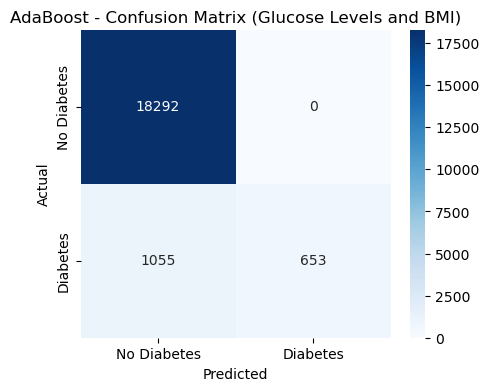

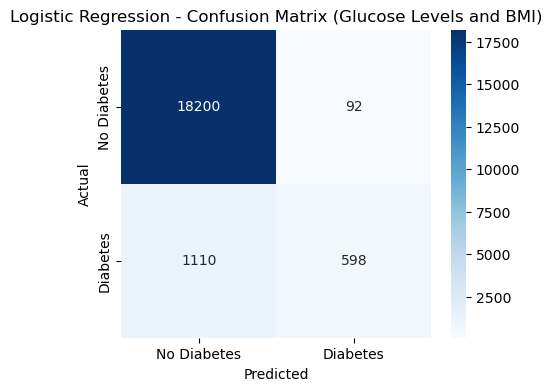

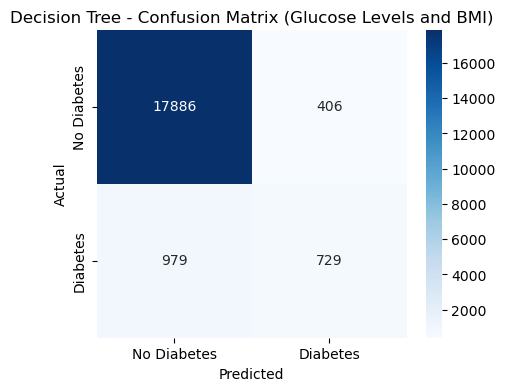

In [13]:
# Visualize the confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'{name} - Confusion Matrix (Glucose Levels and BMI)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
